In [303]:
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import calendar
import matplotlib.pyplot as plt
import datetime as dt

In [304]:
from sklearn.naive_bayes import GaussianNB

In [305]:
data_df = pd.read_csv('Police_Department_Incident_Reports__2018_to_Present.csv')
filtered_data_df = data_df.filter(['Incident Datetime', 'Incident Day of Week','Incident Description', 'Analysis Neighborhood', 'Intersection', 'Latitude', 'Longitude'], axis=1)
incident_df = filtered_data_df.loc[[desc.startswith('Vehicle, Stolen') for desc in filtered_data_df['Incident Description']], :]
#incident_df = pd.read_csv('Filtered_Incident_Report.csv')

In [306]:
incident_df.shape

(15119, 7)

In [307]:
filtered_data_df = incident_df.filter(['Incident Datetime', 'Incident Day of Week', 'Analysis Neighborhood', 'Intersection', 'Latitude', 'Longitude'], axis=1)


In [308]:
# filter incident for year 2019
filtered_data_df['Incident Datetime'] = pd.to_datetime(filtered_data_df['Incident Datetime'])
filtered_data_df= filtered_data_df[filtered_data_df['Incident Datetime'].dt.year==2019]
filtered_data_df = filtered_data_df.dropna()

In [309]:
filtered_data_df.head()

,Incident Datetime,Incident Day of Week,Analysis Neighborhood,Intersection,Latitude,Longitude
2252,2019-08-09 00:00:00,Friday,South of Market,WELSH ST \ 05TH ST,37.777372,-122.399763
7976,2019-07-13 23:16:00,Saturday,Bernal Heights,MISSION ST \ RICHLAND AVE,37.736061,-122.424466
18148,2019-08-11 17:00:00,Sunday,Portola,BOWDOIN ST \ SILVER AVE,37.730249,-122.412338
18878,2019-07-18 12:00:00,Thursday,Mission Bay,04TH ST \ LONG BRIDGE ST,37.773467,-122.391434
20420,2019-10-19 15:00:00,Saturday,Lone Mountain/USF,MCALLISTER ST \ PARSONS ST,37.775611,-122.455441


In [310]:
# Get parking data
parking_data = pd.read_csv('Parking_Meters.csv')

D:\Software\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (28,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [311]:
parking_data.shape

(33288, 45)

In [13]:
#parking_data = parking_data[['PARKING_SPACE_ID', 'STREET_NAME','LONGITUDE', 'LATITUDE' ]]

In [312]:
parking_data.head()

,OBJECTID,PARKING_SPACE_ID,POST_ID,MS_PAY_STATION_ID,MS_SPACE_NUM,SENSOR_FLAG,ON_OFFSTREET_TYPE,OSP_ID,JURISDICTION,PM_DISTRICT_ID,...,NFC_KEY,SPT_CODE,COLLECTION_ROUTE_DESC,COLLECTION_SUBROUTE_DESC,shape,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,33521,132627,818-01520,-,0,Y,ON,0,PORT,2,...,NaN,NaN,NaN,NaN,POINT (-122.389114 37.784286),31,31,1,10,8
1,33670,131615,831-04060,-,0,Y,ON,0,PORT,2,...,NaN,NaN,NaN,NaN,POINT (-122.388504 37.789272),30,30,1,10,8
2,33707,131649,561-02041,561-02040,1,N,ON,0,SFMTA,1,...,NaN,NaN,NaN,NaN,POINT (-122.39328 37.790424),108,108,1,10,8
3,33848,132817,561-03160,-,0,N,ON,0,SFMTA,2,...,3SP5,NaN,NaN,NaN,POINT (-122.39142 37.788933),30,30,1,10,8
4,33895,132860,658-01430,-,0,E,ON,0,SFMTA,1,...,4RJ4,NaN,Folsom St: Unit-800 1st:,Spear Unit-300,POINT (-122.39334 37.792076),108,108,1,10,8


In [15]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [313]:
import math
from shapely.geometry import Polygon, Point
import pandas as pd
import json

# %%
with open('sf_neighborhoods.geojson', 'r') as f:
    geo_data = json.load(f)

# %%

nbr_to_poly = dict()
for nbr in geo_data['features']:
    nbr_to_poly[nbr['properties']['name']] = Polygon(nbr['geometry']['coordinates'][0][0])
# %%
nbr_adjusted = list()
for lon, lat in zip(filtered_data_df['Longitude'], filtered_data_df['Latitude']):
    correct_nbr = None
    if not math.isnan(lon):
        p = Point(lon, lat)
        for nbr, polygon in nbr_to_poly.items():
            if polygon.contains(p):
                correct_nbr = nbr
                break
    nbr_adjusted.append(correct_nbr)
# %%
filtered_data_df.drop('Analysis Neighborhood', axis=1, inplace=True)
filtered_data_df['Analysis Neighborhood'] = nbr_adjusted

In [314]:
filtered_data_df['Incident hour'] = filtered_data_df['Incident Datetime'].apply(lambda x: x.hour)

In [315]:
filtered_data_df['Incident month'] = filtered_data_df['Incident Datetime'].apply(lambda x: x.month)

In [316]:
filtered_data_df['Incident Date'] = filtered_data_df['Incident Datetime'].dt.date

In [86]:
# filtered_data_df=filtered_data_df.drop('Incident Datetime', axis =1)

In [317]:
parking_data.rename(columns={"LATITUDE":"Latitude", "LONGITUDE":"Longitude"},inplace=True)

In [318]:

# %%
with open('sf_neighborhoods.geojson', 'r') as f:
    geo_data = json.load(f)

# %%

nbr_to_poly = dict()
for nbr in geo_data['features']:
    nbr_to_poly[nbr['properties']['name']] = Polygon(nbr['geometry']['coordinates'][0][0])
# %%
nbr_adjusted = list()
for lon, lat in zip(parking_data['Longitude'], parking_data['Latitude']):
    correct_nbr = None
    if not math.isnan(lon):
        p = Point(lon, lat)
        for nbr, polygon in nbr_to_poly.items():
            if polygon.contains(p):
                correct_nbr = nbr
                break
    nbr_adjusted.append(correct_nbr)
# %%
parking_data['Analysis Neighborhood'] = nbr_adjusted

In [319]:
parking_data.head()

,OBJECTID,PARKING_SPACE_ID,POST_ID,MS_PAY_STATION_ID,MS_SPACE_NUM,SENSOR_FLAG,ON_OFFSTREET_TYPE,OSP_ID,JURISDICTION,PM_DISTRICT_ID,...,SPT_CODE,COLLECTION_ROUTE_DESC,COLLECTION_SUBROUTE_DESC,shape,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Analysis Neighborhood
0,33521,132627,818-01520,-,0,Y,ON,0,PORT,2,...,NaN,NaN,NaN,POINT (-122.389114 37.784286),31,31,1,10,8,South Beach
1,33670,131615,831-04060,-,0,Y,ON,0,PORT,2,...,NaN,NaN,NaN,POINT (-122.388504 37.789272),30,30,1,10,8,Rincon Hill
2,33707,131649,561-02041,561-02040,1,N,ON,0,SFMTA,1,...,NaN,NaN,NaN,POINT (-122.39328 37.790424),108,108,1,10,8,Financial District
3,33848,132817,561-03160,-,0,N,ON,0,SFMTA,2,...,NaN,NaN,NaN,POINT (-122.39142 37.788933),30,30,1,10,8,Rincon Hill
4,33895,132860,658-01430,-,0,E,ON,0,SFMTA,1,...,NaN,Folsom St: Unit-800 1st:,Spear Unit-300,POINT (-122.39334 37.792076),108,108,1,10,8,Financial District


In [320]:
filtered_data_df.head()

,Incident Datetime,Incident Day of Week,Intersection,Latitude,Longitude,Analysis Neighborhood,Incident hour,Incident month,Incident Date
2252,2019-08-09 00:00:00,Friday,WELSH ST \ 05TH ST,37.777372,-122.399763,South of Market,0,8,2019-08-09
7976,2019-07-13 23:16:00,Saturday,MISSION ST \ RICHLAND AVE,37.736061,-122.424466,Holly Park,23,7,2019-07-13
18148,2019-08-11 17:00:00,Sunday,BOWDOIN ST \ SILVER AVE,37.730249,-122.412338,Portola,17,8,2019-08-11
18878,2019-07-18 12:00:00,Thursday,04TH ST \ LONG BRIDGE ST,37.773467,-122.391434,Mission Bay,12,7,2019-07-18
20420,2019-10-19 15:00:00,Saturday,MCALLISTER ST \ PARSONS ST,37.775611,-122.455441,Lone Mountain,15,10,2019-10-19


In [321]:
# randonly select 1000 parking spots
parking_data.sample(frac = 1) 
parking_data_small = parking_data[:1000]

In [323]:
parking_data_small.shape

(1000, 46)

In [324]:
parking_data_small.to_csv('Parking_Spots_Data.csv')

In [325]:
incident_parking = (filtered_data_df.assign(dummy=1)
    .merge(parking_data_small.assign(dummy=1),on='dummy')
    .query('abs(Latitude_x-Latitude_y)<=0.001 and abs(Longitude_x-Longitude_y)<=0.001')
    .drop('dummy', axis=1)
)

In [326]:
incident_parking[['Latitude_x','Latitude_y', 'Longitude_x', 'Longitude_y']]

,Latitude_x,Latitude_y,Longitude_x,Longitude_y
253,37.777372,37.777607,-122.399763,-122.399905
604,37.777372,37.778030,-122.399763,-122.399848
759,37.777372,37.778273,-122.399763,-122.399538
785,37.777372,37.776646,-122.399763,-122.399005
3354,37.773467,37.773964,-122.391434,-122.392050
...,...,...,...,...
4890077,37.784501,37.784076,-122.419455,-122.419544
4890693,37.784501,37.784415,-122.419455,-122.419917
4890815,37.784501,37.783746,-122.419455,-122.419391
4890972,37.784501,37.784396,-122.419455,-122.420065


In [33]:
pip install geopy

In [327]:
from geopy.distance import geodesic

In [328]:
for index, row in incident_parking.iterrows():
    dist = geodesic((row['Latitude_x'], row['Longitude_x']), (row['Latitude_y'], row['Longitude_x'])).km
    if(dist >=0.1):
      incident_parking.drop(index, inplace =True)

In [183]:
incident_parking.shape

(4333, 14)

In [105]:
# hour_range_map = {
#   0: "0-3",
#   1: "4-7",
#   2: "8-11",
#   3: "12-15",
#   4: "16-19",
#   5: "20-23", 
# }

In [106]:
# incident_parking['hour_range'] = incident_parking['Incident hour'].apply(lambda x:hour_range_map[(int)(x/4)])

In [329]:
incident_parking.drop(['Latitude_x','Longitude_x'],axis=1, inplace=True)
# incident_parking.drop('Analysis Neighborhood_x', axis =1, inplace = True)

In [330]:
incident_parking.rename(columns={"Latitude_y":"Latitude", "Longitude_y":"Longitude", "Analysis Neighborhood_y":"Analysis Neighborhood" },inplace=True)

In [331]:
positive_df = incident_parking.filter(['Incident Date','PARKING_SPACE_ID','Incident Day of Week', 'Incident hour' , 'Incident month','Analysis Neighborhood','Longitude','Latitude'], axis=1)

In [332]:
positive_df=positive_df.dropna()
positive_df['Incident occured'] =1
positive_df.head()

,Incident Date,PARKING_SPACE_ID,Incident Day of Week,Incident hour,Incident month,Analysis Neighborhood,Longitude,Latitude,Incident occured
253,2019-08-09,138213,Friday,0,8,South of Market,-122.399905,37.777607,1
604,2019-08-09,137229,Friday,0,8,South of Market,-122.399848,37.778030,1
785,2019-08-09,138243,Friday,0,8,South of Market,-122.399005,37.776646,1
3354,2019-07-18,138502,Thursday,12,7,Mission Bay,-122.392050,37.773964,1
3428,2019-07-18,138634,Thursday,12,7,Mission Bay,-122.392283,37.772939,1


In [333]:
positive_df.shape

(4333, 9)

In [334]:
from datetime import date, datetime, timedelta

def datespan(startDate, endDate, delta=timedelta(days=1)):
    currentDate = startDate
    while currentDate < endDate:
        yield currentDate
        currentDate += delta

In [335]:
hour_range = []
date =[]
day=[]

for timestamp in datespan(datetime(2019, 1, 1, 0, 0), 
                          datetime(2019, 12, 31, 23, 0), 
                          delta=timedelta(hours=4)):
    x= hour_range_map[(int)((timestamp.hour)/4)]
    hour_range.append(x)
    date.append(timestamp.date())
    day.append(calendar.day_name[timestamp.date().weekday()])
#     print (x , timestamp.date(),calendar.day_name[timestamp.date().weekday()])
    
negative_df = pd.DataFrame({'Incident Date': date,'Incident Day of Week':day,'hour_range':hour_range})

In [336]:
negative_df['Incident occured'] =0
negative_df.tail(20)

,Incident Date,Incident Day of Week,hour_range,Incident occured
2170,2019-12-28,Saturday,16-19,0
2171,2019-12-28,Saturday,20-23,0
2172,2019-12-29,Sunday,0-3,0
2173,2019-12-29,Sunday,4-7,0
2174,2019-12-29,Sunday,8-11,0
2175,2019-12-29,Sunday,12-15,0
2176,2019-12-29,Sunday,16-19,0
2177,2019-12-29,Sunday,20-23,0
2178,2019-12-30,Monday,0-3,0
2179,2019-12-30,Monday,4-7,0


In [339]:
negative_df.shape

(2190, 5)

In [337]:
negative_df= negative_df.sample(frac=1)

In [338]:
negative_df['Incident hour'] = negative_df['hour_range'].apply(lambda x: np.random.randint(0,4) if x == '0-3' else (np.random.randint(4,8) if x == '4-7' else (np.random.randint(8,12) if x == '8-11' else (np.random.randint(12,16) if x == '12-15' else (np.random.randint(16,20) if x == '16-19' else np.random.randint(20,24))))))


In [340]:
negative_df =negative_df.drop('hour_range', axis =1)
negative_df.head(20)

,Incident Date,Incident Day of Week,Incident occured,Incident hour
941,2019-06-06,Thursday,0,21
2129,2019-12-21,Saturday,0,20
824,2019-05-18,Saturday,0,11
429,2019-03-13,Wednesday,0,12
1706,2019-10-12,Saturday,0,10
369,2019-03-03,Sunday,0,15
2180,2019-12-30,Monday,0,11
178,2019-01-30,Wednesday,0,16
591,2019-04-09,Tuesday,0,15
1173,2019-07-15,Monday,0,13


In [341]:
negative_df.shape

(2190, 4)

In [342]:
# neighborhood_list = positive_df['Analysis Neighborhood'].unique().tolist()
parking_id_list = parking_data_small['PARKING_SPACE_ID'].unique().tolist()
len(parking_id_list)

1000

In [343]:
(x,y,z)=parking_data_small[parking_data_small['PARKING_SPACE_ID'] == 132627][['Longitude','Latitude','Analysis Neighborhood']].values[0]


In [344]:
negative_data = pd.DataFrame()
for p_id in parking_id_list:
    negative_df['PARKING_SPACE_ID'] = p_id
    (x,y,z) = parking_data_small[parking_data_small['PARKING_SPACE_ID'] == p_id][['Longitude','Latitude','Analysis Neighborhood']].values[0]
    negative_df['Longitude'] = x
    negative_df['Latitude'] = y
    negative_df['Analysis Neighborhood'] = z    
    negative_data = pd.concat([negative_data,negative_df])

In [ ]:
for index, row in parking_data_small.iterrows():
    print(row['c1'], row['c2'])

In [345]:
negative_data.rename(columns = {'hour_range':'Incident hour'}, inplace = True)

In [346]:
on = ['Incident Date', 'Incident Day of Week', 'Incident hour','PARKING_SPACE_ID']

negative_data = (negative_data.merge(positive_df[on], on=on, how='left', indicator=True)
              .query('_merge == "left_only"').drop('_merge', 1))

In [347]:
positive_df.shape

(4333, 9)

In [348]:
negative_data.shape 

(2189017, 8)

In [349]:
data = pd.concat([positive_df,negative_data])

In [350]:
data['Incident month'] = data['Incident Date'].apply(lambda x: x.month)

In [351]:
data.drop(['Incident Date'],inplace=True, axis=1)
data

,PARKING_SPACE_ID,Incident Day of Week,Incident hour,Incident month,Analysis Neighborhood,Longitude,Latitude,Incident occured
253,138213,Friday,0,8,South of Market,-122.399905,37.777607,1
604,137229,Friday,0,8,South of Market,-122.399848,37.778030,1
785,138243,Friday,0,8,South of Market,-122.399005,37.776646,1
3354,138502,Thursday,12,7,Mission Bay,-122.392050,37.773964,1
3428,138634,Thursday,12,7,Mission Bay,-122.392283,37.772939,1
...,...,...,...,...,...,...,...,...
2190017,135233,Saturday,7,1,Northern Waterfront,-122.399924,37.799315,0
2190018,135233,Friday,14,1,Northern Waterfront,-122.399924,37.799315,0
2190019,135233,Saturday,12,8,Northern Waterfront,-122.399924,37.799315,0
2190020,135233,Friday,22,5,Northern Waterfront,-122.399924,37.799315,0


In [352]:
data.to_csv('Dataset1_Parking_Data.csv')

In [269]:
data = pd.concat([data,pd.get_dummies(data[['Incident Day of Week','Analysis Neighborhood']])],axis=1)

In [271]:
data.drop(['Incident Day of Week','Analysis Neighborhood'],axis=1,inplace=True)

In [272]:
label = data.pop('Incident occured')

In [273]:
data['Incident occured'] = label

In [147]:
data['Incident occured'] = data['Incident occured'].apply(lambda x: 1 if x=="Yes" else 0)

In [274]:
len(data[data['Incident occured']==1])/len(data)

0.0019756150828841882

In [275]:
data['Incident occured']

253        1
604        1
785        1
3354       1
3428       1
          ..
2190044    0
2190045    0
2190046    0
2190047    0
2190048    0
Name: Incident occured, Length: 2193241, dtype: int64

In [171]:
data.iloc[:,-1]

156617     0
85691      0
408186     0
1662547    0
106164     0
          ..
529247     0
895150     0
1302627    0
563742     0
1298664    0
Name: Incident occured, Length: 2190182, dtype: int64

In [276]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [277]:
data.head()

,Incident hour,Incident month,Longitude,Latitude,Incident Day of Week_Friday,Incident Day of Week_Monday,Incident Day of Week_Saturday,Incident Day of Week_Sunday,Incident Day of Week_Thursday,Incident Day of Week_Tuesday,...,Analysis Neighborhood_Russian Hill,Analysis Neighborhood_Showplace Square,Analysis Neighborhood_South Beach,Analysis Neighborhood_South of Market,Analysis Neighborhood_Telegraph Hill,Analysis Neighborhood_Tenderloin,Analysis Neighborhood_Union Street,Analysis Neighborhood_West Portal,Analysis Neighborhood_Westwood Park,Incident occured
253,0,8,-122.399905,37.777607,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
604,0,8,-122.399848,37.778030,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
785,0,8,-122.399005,37.776646,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3354,12,7,-122.392050,37.773964,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3428,12,7,-122.392283,37.772939,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [278]:
data= data.sample(frac=1)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [279]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

D:\Software\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [280]:
lr_prob = model.predict_proba(X_test)

In [281]:
ns_probs = [0 for _ in range(len(y_test))]


In [282]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)


GaussianNB()

In [283]:
nb_prob =nb.predict_proba(X_test)

In [301]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth =6)
#clf = RandomForestClassifier(n_estimators =2)
clf.fit(X_train,y_train)
rf_prob=clf.predict_proba(X_test)

Default: ROC AUC=0.500
Logistic: ROC AUC=0.650
Naive Bayes: ROC AUC=0.627
Decision Tree: ROC AUC=0.714


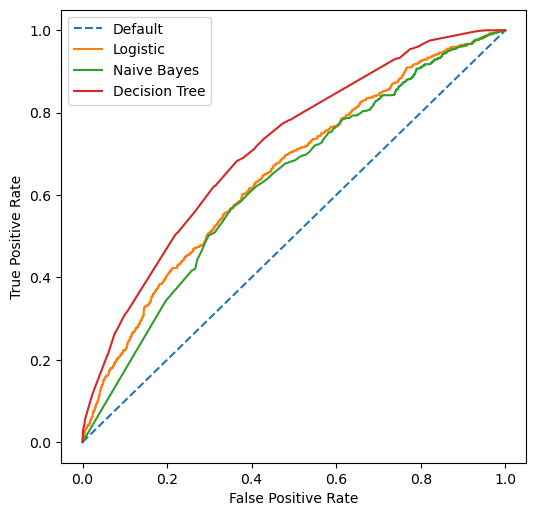

In [302]:
lr_probs = lr_prob[:, 1]
nb_probs = nb_prob[:, 1]
rf_probs = rf_prob[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
# summarize scores
print('Default: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('Decision Tree: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
fig = plt.figure(figsize=(6,6), dpi=100)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Default')
plt.plot(lr_fpr, lr_tpr, label='Logistic')
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes')
plt.plot(rf_fpr, rf_tpr, label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [299]:
rf_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [245]:
data= data.sample(frac=1)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [246]:
y_train

1459260    No
1707305    No
359232     No
907950     No
2876630    No
           ..
2783504    No
626932     No
2888259    No
1781607    No
84688      No
Name: Incident occured, Length: 2167183, dtype: category
Categories (2, object): ['No', 'Yes']

In [247]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

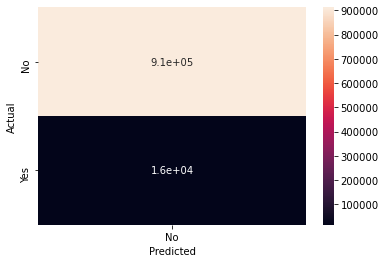

In [248]:
log_confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(log_confusion_matrix, annot=True)

In [249]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.9825343402304494


In [250]:
recall_log = log_confusion_matrix.iloc[1][1]/ (confusion_matrix.iloc[1][1]+ confusion_matrix.iloc[1][0])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [251]:
recall_log*100

NameError: name 'recall_log' is not defined

In [99]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

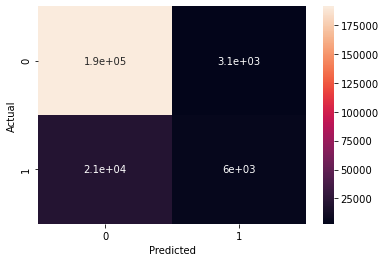

In [100]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [132]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8886040760329982


In [347]:
data['Incident occured'] = data['Incident occured'].apply(lambda x: 'Yes' if x==1 else 'No')

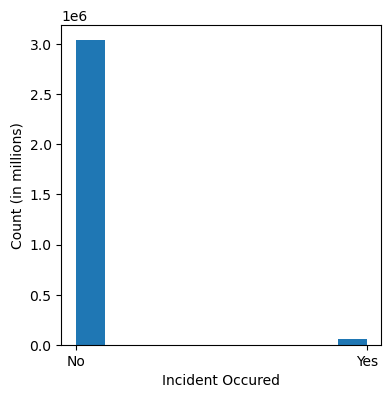

In [348]:
fig = plt.figure(figsize=(4,4), dpi=100)

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.hist(data['Incident occured'], )
plt.xlabel('Incident Occured')
plt.ylabel('Count (in millions)')
plt.show()

In [108]:
data['Incident occured'] = data['Incident occured'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [112]:
confusion_matrix

Predicted,0,1
Actual,,
0,191037,3116
1,21412,6023


In [122]:
np.sum(y_test ==1)

27435

In [126]:
recall = confusion_matrix.iloc[1][1]/ (confusion_matrix.iloc[1][1]+ confusion_matrix.iloc[1][0])

In [128]:
recall*100

21.953708766174596

## Naive Bayes

In [237]:
X_train

,Incident Day of Week_Friday,Incident Day of Week_Monday,Incident Day of Week_Saturday,Incident Day of Week_Sunday,Incident Day of Week_Thursday,Incident Day of Week_Tuesday,Incident Day of Week_Wednesday,hour_range_0-3,hour_range_12-15,hour_range_16-19,...,Analysis Neighborhood_Tenderloin,Analysis Neighborhood_Treasure Island,Analysis Neighborhood_Union Street,Analysis Neighborhood_University Mound,Analysis Neighborhood_Upper Market,Analysis Neighborhood_Visitacion Valley,Analysis Neighborhood_West Portal,Analysis Neighborhood_Western Addition,Analysis Neighborhood_Westwood Highlands,Analysis Neighborhood_Westwood Park
346129,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
474741,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
475949,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
427945,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
436512,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323649,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
615473,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
600099,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53691,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)

In [239]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.5856499449428669


In [241]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
recall = confusion_matrix.iloc[1][1]/ (confusion_matrix.iloc[1][1]+ confusion_matrix.iloc[1][0])
recall*100

85.65362228648826

In [242]:
confusion_matrix

Predicted,No,Yes
Actual,,
No,106375,87896
Yes,3919,23398


In [243]:
y_test

207968    Yes
375080     No
468637     No
144077    Yes
385306    Yes
         ... 
39452      No
170910     No
627131     No
425650     No
557053     No
Name: Incident occured, Length: 221588, dtype: category
Categories (2, object): ['No', 'Yes']

In [251]:
data[data['Incident occured'] == 'Yes']


,Incident Day of Week_Friday,Incident Day of Week_Monday,Incident Day of Week_Saturday,Incident Day of Week_Sunday,Incident Day of Week_Thursday,Incident Day of Week_Tuesday,Incident Day of Week_Wednesday,hour_range_0-3,hour_range_12-15,hour_range_16-19,...,Analysis Neighborhood_Treasure Island,Analysis Neighborhood_Union Street,Analysis Neighborhood_University Mound,Analysis Neighborhood_Upper Market,Analysis Neighborhood_Visitacion Valley,Analysis Neighborhood_West Portal,Analysis Neighborhood_Western Addition,Analysis Neighborhood_Westwood Highlands,Analysis Neighborhood_Westwood Park,Incident occured
310998,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Yes
332693,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Yes
320470,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
337814,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
393181,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285493,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Yes
235011,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,Yes
326124,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
360099,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes


In [253]:
data[data['Incident occured'] == 'No']

,Incident Day of Week_Friday,Incident Day of Week_Monday,Incident Day of Week_Saturday,Incident Day of Week_Sunday,Incident Day of Week_Thursday,Incident Day of Week_Tuesday,Incident Day of Week_Wednesday,hour_range_0-3,hour_range_12-15,hour_range_16-19,...,Analysis Neighborhood_Treasure Island,Analysis Neighborhood_Union Street,Analysis Neighborhood_University Mound,Analysis Neighborhood_Upper Market,Analysis Neighborhood_Visitacion Valley,Analysis Neighborhood_West Portal,Analysis Neighborhood_Western Addition,Analysis Neighborhood_Westwood Highlands,Analysis Neighborhood_Westwood Park,Incident occured
724525,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,No
371351,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,No
585449,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,No
679090,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,No
430937,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492605,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,No
287562,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,No
125556,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,No
400523,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,No


In [255]:
647374/(647374+91250)

0.8764594705831383